In [1]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, KFold, train_test_split
import seaborn as sb
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import preprocessing, tree
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
dataset = pd.read_csv("D:/MASTER/MASINSKO UCENJE/I projekat/Data set/drug_consumption.data")

In [3]:
dataset.head()

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness to experience,Agreeableness,Conscientiousness,...,Ecstasy consumption,Heroin consumption,Ketamine consumption,Legal highs consumption,Lysergic acid diethylamide consumption,Methadone consumption,Magic mushrooms consumption,Nicotine consumption,Fictitious drug Semeron consumption,Volatile substance abuse consumption
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [4]:
dataset.shape

(1885, 31)

In [5]:
dataset.describe()

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness to experience,Agreeableness,Conscientiousness,Impulsiveness,Sensation seeking
count,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [6]:
dataset.dtypes

Age                                       float64
Gender                                    float64
Education                                 float64
Country                                   float64
Ethnicity                                 float64
Neuroticism                               float64
Extraversion                              float64
Openness to experience                    float64
Agreeableness                             float64
Conscientiousness                         float64
Impulsiveness                             float64
Sensation seeking                         float64
Alcohol consumption                        object
Amphetamines consumption                   object
Amyl nitrite consumption                   object
Benzodiazepine consumption                 object
Caffeine consumption                       object
Cannabis consumption                       object
Chocolate consumption                      object
Cocaine consumption                        object


In [7]:
dataset.isna().sum()

Age                                       0
Gender                                    0
Education                                 0
Country                                   0
Ethnicity                                 0
Neuroticism                               0
Extraversion                              0
Openness to experience                    0
Agreeableness                             0
Conscientiousness                         0
Impulsiveness                             0
Sensation seeking                         0
Alcohol consumption                       0
Amphetamines consumption                  0
Amyl nitrite consumption                  0
Benzodiazepine consumption                0
Caffeine consumption                      0
Cannabis consumption                      0
Chocolate consumption                     0
Cocaine consumption                       0
Crack consumption                         0
Ecstasy consumption                       0
Heroin consumption              

In [8]:
dataset.isnull().values.any()

False

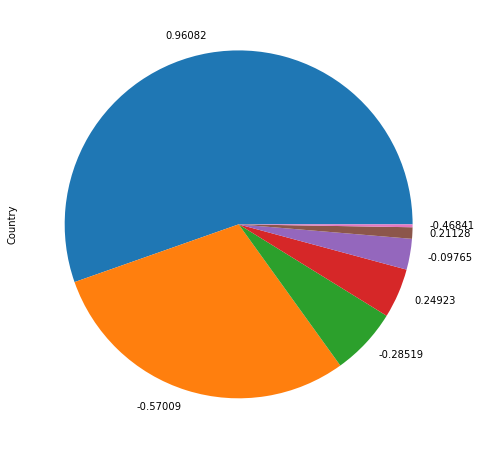

In [9]:
countries = dataset['Country'].value_counts().plot(kind='pie', figsize=(8, 8))

 0.96082  -> UK ;        -0.57009  -> USA;    -0.28519  -> Other; 
 0.24923  -> Canada;
-0.09765  -> Australia; 
 0.21128  -> Ireland;
-0.46841  -> New Zealand;

In [10]:
dataset['Country'].value_counts()

 0.96082    1044
-0.57009     557
-0.28519     118
 0.24923      87
-0.09765      54
 0.21128      20
-0.46841       5
Name: Country, dtype: int64

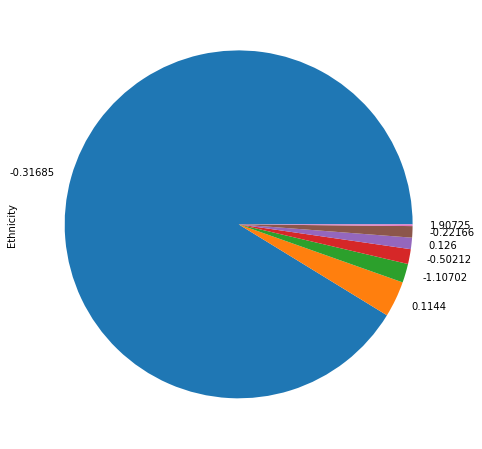

In [11]:
ethnicity = dataset['Ethnicity'].value_counts().plot(kind='pie', figsize=(8, 8))

In [12]:
dataset['Ethnicity'].value_counts()

-0.31685    1720
 0.11440      63
-1.10702      33
-0.50212      26
 0.12600      20
-0.22166      20
 1.90725       3
Name: Ethnicity, dtype: int64

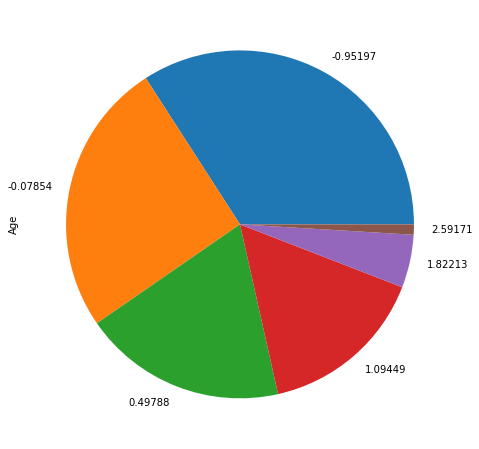

In [13]:
age = dataset['Age'].value_counts().plot(kind='pie', figsize=(8, 8))

In [14]:
dataset['Age'].value_counts()

-0.95197    643
-0.07854    481
 0.49788    356
 1.09449    294
 1.82213     93
 2.59171     18
Name: Age, dtype: int64

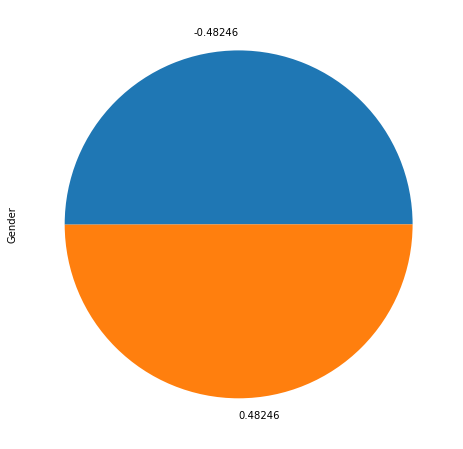

In [15]:
gender = dataset['Gender'].value_counts().plot(kind='pie', figsize=(8, 8))

In [16]:
dataset['Gender'].value_counts()

-0.48246    943
 0.48246    942
Name: Gender, dtype: int64

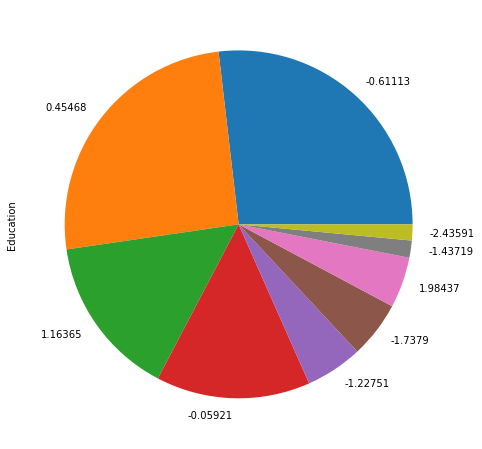

In [17]:
education = dataset['Education'].value_counts().plot(kind='pie', figsize=(8,8))

In [18]:
dataset['Education'].value_counts()

-0.61113    506
 0.45468    480
 1.16365    283
-0.05921    270
-1.22751    100
-1.73790     99
 1.98437     89
-1.43719     30
-2.43591     28
Name: Education, dtype: int64

In [19]:
dataset.mode()

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness to experience,Agreeableness,Conscientiousness,...,Ecstasy consumption,Heroin consumption,Ketamine consumption,Legal highs consumption,Lysergic acid diethylamide consumption,Methadone consumption,Magic mushrooms consumption,Nicotine consumption,Fictitious drug Semeron consumption,Volatile substance abuse consumption
0,-0.95197,-0.48246,-0.61113,0.96082,-0.31685,-0.46725,0.00332,-0.01928,0.13136,0.58489,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


<AxesSubplot:>

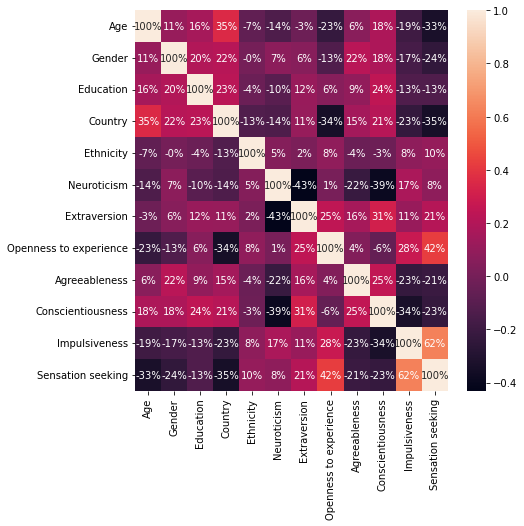

In [20]:
plt.figure(figsize=(7,7))
sb.heatmap(dataset.corr(), annot=True, fmt='.0%')

In [21]:
dataset.head()

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness to experience,Agreeableness,Conscientiousness,...,Ecstasy consumption,Heroin consumption,Ketamine consumption,Legal highs consumption,Lysergic acid diethylamide consumption,Methadone consumption,Magic mushrooms consumption,Nicotine consumption,Fictitious drug Semeron consumption,Volatile substance abuse consumption
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [22]:
dataset['Ecstasy consumption'].unique()

array(['CL0', 'CL4', 'CL1', 'CL3', 'CL2', 'CL6', 'CL5'], dtype=object)

In [23]:
droge= dataset.loc[ : , 'Alcohol consumption': 'Volatile substance abuse consumption']

In [24]:
droge

,Alcohol consumption,Amphetamines consumption,Amyl nitrite consumption,Benzodiazepine consumption,Caffeine consumption,Cannabis consumption,Chocolate consumption,Cocaine consumption,Crack consumption,Ecstasy consumption,Heroin consumption,Ketamine consumption,Legal highs consumption,Lysergic acid diethylamide consumption,Methadone consumption,Magic mushrooms consumption,Nicotine consumption,Fictitious drug Semeron consumption,Volatile substance abuse consumption
1,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,CL5,CL0,CL0,CL0,CL4,CL5,CL4,CL0,CL0,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1885,CL5,CL0,CL0,CL0,CL5,CL3,CL4,CL0,CL0,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1886,CL4,CL6,CL5,CL5,CL6,CL6,CL6,CL4,CL0,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1887,CL5,CL0,CL0,CL0,CL6,CL6,CL5,CL0,CL0,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [25]:
droge.keys()

Index(['Alcohol consumption', 'Amphetamines consumption',
       'Amyl nitrite consumption', 'Benzodiazepine consumption',
       'Caffeine consumption', 'Cannabis consumption', 'Chocolate consumption',
       'Cocaine consumption', 'Crack consumption', 'Ecstasy consumption',
       'Heroin consumption', 'Ketamine consumption', 'Legal highs consumption',
       'Lysergic acid diethylamide consumption', 'Methadone consumption',
       'Magic mushrooms consumption', 'Nicotine consumption',
       'Fictitious drug Semeron consumption',
       'Volatile substance abuse consumption'],
      dtype='object')

In [26]:
lbl_encode= LabelEncoder()

In [27]:
lbl_encode.fit_transform(droge.keys())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 12, 13, 14, 16, 15, 17,
       10, 18])

In [28]:
droge.head()

,Alcohol consumption,Amphetamines consumption,Amyl nitrite consumption,Benzodiazepine consumption,Caffeine consumption,Cannabis consumption,Chocolate consumption,Cocaine consumption,Crack consumption,Ecstasy consumption,Heroin consumption,Ketamine consumption,Legal highs consumption,Lysergic acid diethylamide consumption,Methadone consumption,Magic mushrooms consumption,Nicotine consumption,Fictitious drug Semeron consumption,Volatile substance abuse consumption
1,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [29]:
for column in droge.keys():
    le = LabelEncoder()
    dataset[column] = le.fit_transform(dataset[column])

In [30]:
dataset


,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness to experience,Agreeableness,Conscientiousness,...,Ecstasy consumption,Heroin consumption,Ketamine consumption,Legal highs consumption,Lysergic acid diethylamide consumption,Methadone consumption,Magic mushrooms consumption,Nicotine consumption,Fictitious drug Semeron consumption,Volatile substance abuse consumption
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,2,0,0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,4,0,2,0,2,3,0,4,0,0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,1,0,0,0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,2,0,0,0,0,2,0,0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,1,0,0,1,0,0,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,0,0,0,3,3,0,0,0,0,5
1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,2,0,0,3,5,4,4,5,0,0
1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,4,0,2,0,2,0,2,6,0,0
1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,3,0,0,3,3,0,3,4,0,0


In [31]:
dataset.iloc[:, [15, 16, 17]]

,Benzodiazepine consumption,Caffeine consumption,Cannabis consumption
1,2,6,0
2,0,6,4
3,0,6,3
4,3,5,2
5,0,6,3
...,...,...,...
1884,0,4,5
1885,0,5,3
1886,5,6,6
1887,0,6,6


In [32]:
for column in droge.keys():
    le = LabelEncoder()
    droge[column] = le.fit_transform(droge[column])

In [33]:
droge

,Alcohol consumption,Amphetamines consumption,Amyl nitrite consumption,Benzodiazepine consumption,Caffeine consumption,Cannabis consumption,Chocolate consumption,Cocaine consumption,Crack consumption,Ecstasy consumption,Heroin consumption,Ketamine consumption,Legal highs consumption,Lysergic acid diethylamide consumption,Methadone consumption,Magic mushrooms consumption,Nicotine consumption,Fictitious drug Semeron consumption,Volatile substance abuse consumption
1,5,2,0,2,6,0,5,0,0,0,0,0,0,0,0,0,2,0,0
2,5,2,2,0,6,4,6,3,0,4,0,2,0,2,3,0,4,0,0
3,6,0,0,0,6,3,4,0,0,0,0,0,0,0,0,1,0,0,0
4,4,0,0,3,5,2,4,2,0,0,0,2,0,0,0,0,2,0,0
5,4,1,1,0,6,3,6,0,0,1,0,0,1,0,0,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,5,0,0,0,4,5,4,0,0,0,0,0,3,3,0,0,0,0,5
1885,5,0,0,0,5,3,4,0,0,2,0,0,3,5,4,4,5,0,0
1886,4,6,5,5,6,6,6,4,0,4,0,2,0,2,0,2,6,0,0
1887,5,0,0,0,6,6,5,0,0,3,0,0,3,3,0,3,4,0,0


In [34]:
#dataset.replace(["CL0","CL1","CL2","CL3","CL4","CL5","CL6"],[0.0,1.0,2.0,3.0,4.0,5.0,6.0],inplace=True)
#dataset.head()

<AxesSubplot:>

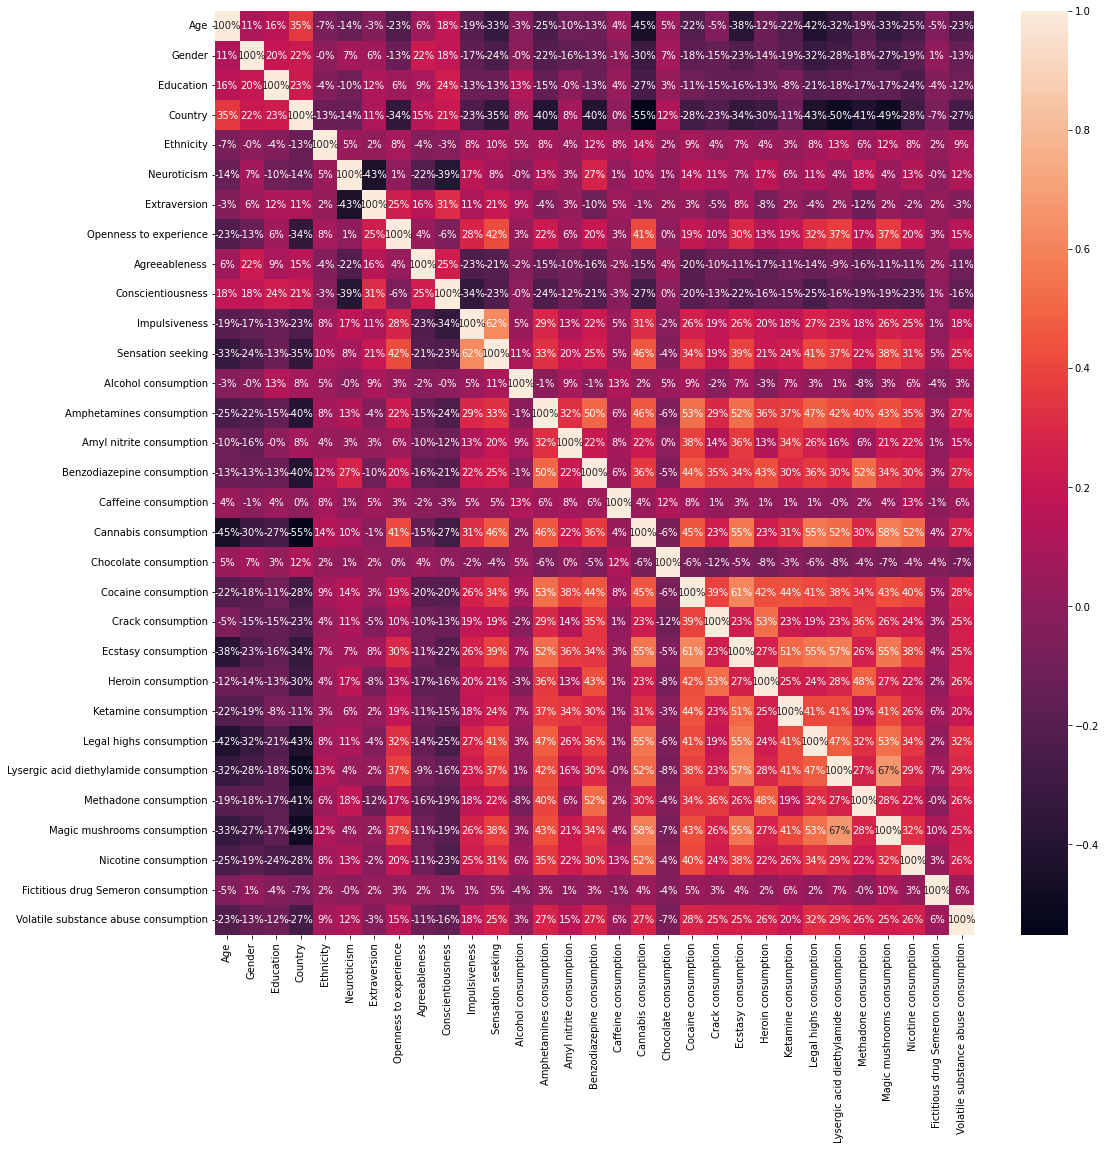

In [35]:
plt.figure(figsize=(17,17))
sb.heatmap(dataset.corr(), annot=True, fmt='.0%')

In [36]:
feature_names=[ 'Age', 
    'Gender', 
    'Education', 
    'Country',
    'Ethnicity',
'Neuroticism',
    'Extraversion',
    'Openness to experience',
    'Agreeableness',
    'Conscientiousness',
    'Impulsiveness',
    'Sensation seeking',
'Alcohol consumption',
'Caffeine consumption',
'Chocolate consumption',
'Nicotine consumption']

In [37]:
part_df = pd.DataFrame.copy(dataset[feature_names])
part_df.head()

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness to experience,Agreeableness,Conscientiousness,Impulsiveness,Sensation seeking,Alcohol consumption,Caffeine consumption,Chocolate consumption,Nicotine consumption
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,5,6,5,2
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5,6,6,4
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,6,6,4,0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,5,4,2
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,6,6,2


In [38]:
drug_names = ['Amphetamines consumption',
    'Amyl nitrite consumption',
    'Benzodiazepine consumption',
    'Cannabis consumption',
    'Cocaine consumption',
    'Crack consumption',
    'Ecstasy consumption',
    'Heroin consumption',
    'Ketamine consumption',
    'Legal highs consumption',
    'Lysergic acid diethylamide consumption',
    'Methadone consumption',
    'Magic mushrooms consumption',
    'Fictitious drug Semeron consumption',
    'Volatile substance abuse consumption']

In [39]:
part_df["WillUse"] = int(0)

In [40]:
for i in dataset.index.values:
    count = -1
    while count < 14:
        count += 1
        # print('i is ', i, 'count is ', count)
        # check for illegal drug use within past decade or less
        if dataset.loc[i, drug_names[count]] > 2:
            # set the prediction to 1 = likely to use illegal drugs
            part_df.loc[[i],['WillUse']] = int(1)
            # print ("For i of ", i," target is switched to ", part_df.loc[[i],['WillUse']])
            break

In [41]:
part_df.describe()

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness to experience,Agreeableness,Conscientiousness,Impulsiveness,Sensation seeking,Alcohol consumption,Caffeine consumption,Chocolate consumption,Nicotine consumption,WillUse
count,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292,4.635013,5.483820,5.106631,3.200531,0.625464
std,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701,1.331253,1.114648,1.089315,2.413932,0.484131
min,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930,4.000000,5.000000,5.000000,1.000000,0.000000
50%,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870,5.000000,6.000000,5.000000,3.000000,1.000000
75%,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400,6.000000,6.000000,6.000000,6.000000,1.000000
max,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730,6.000000,6.000000,6.000000,6.000000,1.000000


[0.11049137 0.05359439 0.07568745 0.23746871 0.02126437 0.0780053
 0.07270108 0.10588736 0.07090338 0.09424364 0.07975295]


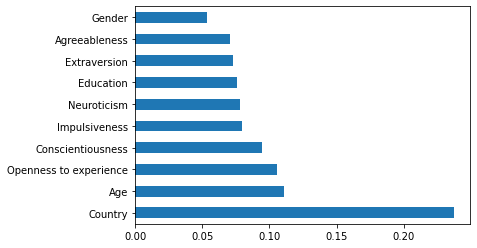

In [52]:
from sklearn.ensemble import ExtraTreesClassifier
X_f = part_df.iloc[:,0:11] 
y_f = part_df.iloc[:,-1]    
model = ExtraTreesClassifier()
model.fit(X_f,y_f)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X_f.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [42]:
X = np.array(part_df[feature_names])
y = np.array(part_df['WillUse'])

In [43]:
X_train, X_test = X[:942, ...], X[943:, ...]

y_train = y[:942]
y_test = y[943:]

# Random Forest Decision Tree Classifier

In [44]:
dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

# Check the accuracy 
accuracy = dtc.score(X_test, y_test)
print("Random Forest Decision Tree = ",accuracy)

Random Forest Decision Tree =  0.8174097664543525


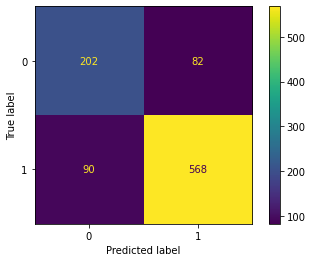

In [55]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dtc, X_test, y_test)

# Gaussian Naive Bayes Classifier

In [45]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
# Check the accuracy 
accuracy = gnb.score(X_test, y_test)
print("Naive Bayes= ",accuracy)

Naive Bayes=  0.8789808917197452


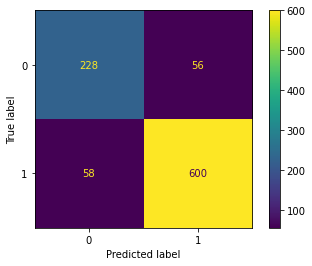

In [56]:
plot_confusion_matrix(gnb, X_test, y_test)

# K-Nearest Neighbor

In [46]:
from sklearn.neighbors import KNeighborsClassifier  
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# Check the accuracy 
accuracy = knn.score(X_test, y_test)
print("KNN = ",accuracy)

KNN =  0.8471337579617835


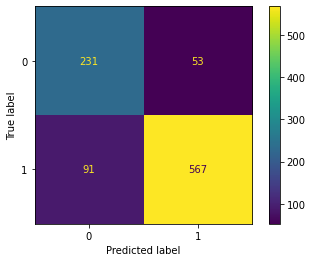

In [57]:
plot_confusion_matrix(knn, X_test, y_test)

Iz dobijenih rezultata treniranja modela možemo zaključiti da je Gaussian Naive Bayes Classifier najbolji model za predviđanje naših rezultata. 

Cross-validacija:

KNN:

In [47]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.8123156591241697


Naive Bayes:

In [48]:
print(cross_val_score(gnb, X, y, cv=10, scoring='accuracy').mean())

0.8425194191151638


Random Forest Decision Tree:

In [49]:
print(cross_val_score(dtc, X, y, cv=10, scoring='accuracy').mean())

0.7708938421704379
